# Problem Statement, Motivation & Dataset

Churn rate is a critical metric of customer satisfaction. Low churn rates mean happy customers; high churn rates mean customers are leaving you. A small rate of monthly/quarterly churn compounds over time. 1% monthly churn quickly translates to almost 12% yearly churn. 

According to Forbes, it takes a lot more money (up to five times more) to get new customers than to keep the ones you already have. Churn tells you how many existing customers are leaving your business, so lowering churn has a big positive impact on your revenue streams.

Churn is a good indicator of growth potential. Churn rates track lost customers, and growth rates track new customers—comparing and analyzing both of these metrics tells you exactly how much your business is growing over time. If growth is higher than churn, you can say your business is growing. If churn is higher than growth, your business is getting smaller. 

### Dataset https://www.kaggle.com/datasets/blastchar/telco-customer-churn

## Importance of customer churn prediction
Predicting churn is a good way to create proactive marketing campaigns targeted at the customers that are about to churn. 

Machine learning and data analysis are powerful ways to identify and predict churn. During churn prediction, you’re also:

• Identifying at-risk customers,
• Identifying customer pain points,
• Identifying strategy/methods to lower churn and increase customer retention.

### Churn prediction use cases
Customer churn prediction is different based on the company’s line of business (LoB), operation workflow, and data architecture. The prediction model and application have to be tailored to the company’s needs, goals, and expectations. Some use cases for churn prediction are in:

• Telecommunication (cable or wireless network segment),
• Software as a service provider (SaaS),
• Retail market,
• Subscription-based businesses (media, music and video streaming services, etc.),
• Financial institutions (banking, insurance companies, Mortgage Companies, etc.),
• Marketing,
• Human Resource Management (Employee turnover).


In [1]:
!python --version

Python 3.9.16


In [2]:
!python3 --version

Python 3.9.16


# Import libraries

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import seaborn as sns

In [6]:
from matplotlib import pyplot as plt

In [177]:
import streamlit as st

ModuleNotFoundError: No module named 'streamlit'

In [7]:
%matplotlib inline

# EDA & Load Dataset

In [8]:
orig_df = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [166]:
#Get overview of the data
def dataoveriew(df, message):
    print(f'{message}:n')
    print('Number of rows: ', df.shape[0])
    print("nNumber of features:", df.shape[1])
    print("nData Features:")
    print(df.columns.tolist())
    print("nMissing values:", df.isnull().sum().values.sum())
    print("nUnique values:")
    print(df.nunique())

dataoveriew(orig_df, 'Overview of the dataset')

Overview of the dataset:n
Number of rows:  7043
nNumber of features: 21
nData Features:
['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents', 'tenure', 'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod', 'monthlycharges', 'totalcharges', 'churn']
nMissing values: 0
nUnique values:
customerid          7043
gender                 2
seniorcitizen          2
partner                2
dependents             2
tenure                73
phoneservice           2
multiplelines          3
internetservice        3
onlinesecurity         3
onlinebackup           3
deviceprotection       3
techsupport            3
streamingtv            3
streamingmovies        3
contract               3
paperlessbilling       2
paymentmethod          4
monthlycharges      1585
totalcharges        6531
churn                  2
dtype: int64


The dataset has 7043 rows and 21 columns. 

There are 17 categorical features:
```
CustomerID: Customer ID unique for each customer
gender: Whether the customer is a male or a female
SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
Partner: Whether the customer has a partner or not (Yes, No)
Dependent: Whether the customer has dependents or not (Yes, No)
PhoneService: Whether the customer has a phone service or not (Yes, No)
MultipeLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
OnlineBackup: Whether the customer has an online backup or not (Yes, No, No internet service)
DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
Contract: The contract term of the customer (Month-to-month, One year, Two years)
PaperlessBilling: The contract term of the customer (Month-to-month, One year, Two years)
PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
```
Next, there are 3 numerical features:
```
Tenure: Number of months the customer has stayed with the company
MonthlyCharges: The amount charged to the customer monthly
TotalCharges: The total amount charged to the customer
```

Finally, there’s a prediction feature:
```
Churn: Whether the customer churned or not (Yes or No)
```

These features can also be subdivided into:

##### Demographic customer information:
gender , SeniorCitizen , Partner , Dependents

##### Services that each customer has signed up for:
PhoneService , MultipleLines , InternetService , OnlineSecurity , OnlineBackup , DeviceProtection , TechSupport , StreamingTV , StreamingMovies,

##### Customer account information:
tenure , Contract , PaperlessBilling , PaymentMethod , MonthlyCharges , TotalCharges

In [9]:
len(orig_df)

7043

In [10]:
orig_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
orig_df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [12]:
orig_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# Data Preparation

In [13]:
total_charges = pd.to_numeric(orig_df.TotalCharges, errors='coerce')

In [14]:
orig_df[total_charges.isnull()][['customerID', 'TotalCharges']]

,customerID,TotalCharges
488,4472-LVYGI,
753,3115-CZMZD,
936,5709-LVOEQ,
1082,4367-NUYAO,
1340,1371-DWPAZ,
3331,7644-OMVMY,
3826,3213-VVOLG,
4380,2520-SGTTA,
5218,2923-ARZLG,
6670,4075-WKNIU,


In [15]:
orig_df.TotalCharges = pd.to_numeric(orig_df.TotalCharges, errors='coerce')

In [16]:
orig_df.TotalCharges = orig_df.TotalCharges.fillna(0)

In [17]:
orig_df.columns = orig_df.columns.str.lower().str.replace(' ', '_')

In [18]:
string_cols = list(orig_df.dtypes[orig_df.dtypes == 'object'].index)

In [19]:
for col in string_cols:
    orig_df[col] = orig_df[col].str.lower().str.replace(' ', '_')

In [20]:
orig_df.churn = (orig_df.churn == 'yes').astype(int)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
df_train_full, df_test = train_test_split(orig_df, test_size=0.2, random_state=1)

In [23]:
df_train_full.head().T

,1814,5946,3881,2389,3676
customerid,5442-pptjy,6261-rcvns,2176-osjuv,6161-erdgd,2364-ufrom
gender,male,female,male,male,male
seniorcitizen,0,0,0,0,0
partner,yes,no,yes,yes,no
dependents,yes,no,no,yes,no
tenure,12,42,71,71,30
phoneservice,yes,yes,yes,yes,yes
multiplelines,no,no,yes,yes,no
internetservice,no,dsl,dsl,dsl,dsl
onlinesecurity,no_internet_service,yes,yes,yes,yes


In [24]:
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11)

In [25]:
y_train = df_train.churn.values

In [26]:
y_val = df_val.churn.values

In [27]:
del df_train['churn']

In [28]:
del df_val['churn']

In [29]:
df_train_full.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [30]:
df_train_full.churn.value_counts()

0    4113
1    1521
Name: churn, dtype: int64

# EDA

In [31]:
global_mean = df_train_full.churn.mean()

In [32]:
round(global_mean, 3)

0.27

In [33]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice',
'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod']
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [34]:
df_train_full[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

In [35]:
female_mean = df_train_full[df_train_full.gender == 'female'].churn.mean()

In [36]:
male_mean = df_train_full[df_train_full.gender == 'male'].churn.mean()

In [37]:
print('global mean:', round(global_mean, 3))

global mean: 0.27


In [38]:
print('gender == female:', round(female_mean, 3))
print('gender == male:', round(male_mean, 3))

gender == female: 0.277
gender == male: 0.263


In [39]:
partner_yes = df_train_full[df_train_full.partner == 'yes'].churn.mean()
partner_no = df_train_full[df_train_full.partner == 'no'].churn.mean()

In [40]:
print('partner == yes:', round(partner_yes, 3))
print('partner == no:', round(partner_no, 3))

partner == yes: 0.205
partner == no: 0.33


In [41]:
df_group = df_train_full.groupby(by='gender').churn.agg(['mean'])

In [42]:
df_group['diff'] = df_group['mean'] - global_mean

In [43]:
df_group['risk'] = df_group['mean'] / global_mean

In [44]:
df_group

,mean,diff,risk
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


In [45]:
from IPython.display import display

In [46]:
for col in categorical:
    df_group = df_train_full.groupby(by=col).churn.agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['rate'] = df_group['mean'] / global_mean
    display(df_group)

,mean,diff,rate
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


,mean,diff,rate
seniorcitizen,,,
0,0.242270,-0.027698,0.897403
1,0.413377,0.143409,1.531208


,mean,diff,rate
partner,,,
no,0.329809,0.059841,1.221659
yes,0.205033,-0.064935,0.759472


,mean,diff,rate
dependents,,,
no,0.313760,0.043792,1.162212
yes,0.165666,-0.104302,0.613651


,mean,diff,rate
phoneservice,,,
no,0.241316,-0.028652,0.893870
yes,0.273049,0.003081,1.011412


,mean,diff,rate
multiplelines,,,
no,0.257407,-0.012561,0.953474
no_phone_service,0.241316,-0.028652,0.893870
yes,0.290742,0.020773,1.076948


,mean,diff,rate
internetservice,,,
dsl,0.192347,-0.077621,0.712482
fiber_optic,0.425171,0.155203,1.574895
no,0.077805,-0.192163,0.288201


,mean,diff,rate
onlinesecurity,,,
no,0.420921,0.150953,1.559152
no_internet_service,0.077805,-0.192163,0.288201
yes,0.153226,-0.116742,0.567570


,mean,diff,rate
onlinebackup,,,
no,0.404323,0.134355,1.497672
no_internet_service,0.077805,-0.192163,0.288201
yes,0.217232,-0.052736,0.804660


,mean,diff,rate
deviceprotection,,,
no,0.395875,0.125907,1.466379
no_internet_service,0.077805,-0.192163,0.288201
yes,0.230412,-0.039556,0.853480


,mean,diff,rate
techsupport,,,
no,0.418914,0.148946,1.551717
no_internet_service,0.077805,-0.192163,0.288201
yes,0.159926,-0.110042,0.592390


,mean,diff,rate
streamingtv,,,
no,0.342832,0.072864,1.269897
no_internet_service,0.077805,-0.192163,0.288201
yes,0.302723,0.032755,1.121328


,mean,diff,rate
streamingmovies,,,
no,0.338906,0.068938,1.255358
no_internet_service,0.077805,-0.192163,0.288201
yes,0.307273,0.037305,1.138182


,mean,diff,rate
contract,,,
month-to-month,0.431701,0.161733,1.599082
one_year,0.120573,-0.149395,0.446621
two_year,0.028274,-0.241694,0.104730


,mean,diff,rate
paperlessbilling,,,
no,0.172071,-0.097897,0.637375
yes,0.338151,0.068183,1.252560


,mean,diff,rate
paymentmethod,,,
bank_transfer_(automatic),0.168171,-0.101797,0.622928
credit_card_(automatic),0.164339,-0.105630,0.608733
electronic_check,0.455890,0.185922,1.688682
mailed_check,0.193870,-0.076098,0.718121


In [47]:
from sklearn.metrics import mutual_info_score

In [48]:
def calculate_mi(series):
    return mutual_info_score(series, df_train_full.churn)

In [49]:
df_mi = df_train_full[categorical].apply(calculate_mi)

In [50]:
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')

In [51]:
df_mi

,MI
contract,0.098320
onlinesecurity,0.063085
techsupport,0.061032
internetservice,0.055868
onlinebackup,0.046923
deviceprotection,0.043453
paymentmethod,0.043210
streamingtv,0.031853
streamingmovies,0.031581
paperlessbilling,0.017589


In [52]:
df_train_full[numerical].corrwith(df_train_full.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

# Feature Engineering

In [53]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')

In [54]:
from sklearn.feature_extraction import DictVectorizer

In [55]:
dv = DictVectorizer(sparse=False)

In [56]:
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [57]:
x_train = dv.transform(train_dict)

In [58]:
x_train[0]

array([0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 8.6100e+01, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 7.1000e+01, 6.0459e+03])

In [59]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

## $y_i$ = 1 means the customer churned
## $y_i$ = 0 means the customer stayed with us

# Modelling

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
model = LogisticRegression(solver='liblinear', random_state=1)

In [62]:
model.fit(x_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [63]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')

In [64]:
X_val = dv.transform(val_dict)

In [65]:
y_pred = model.predict_proba(X_val)[:,1]

### Objective:
we wanted to use this model: we wanted to retain customers by \ 
identifying those who are about to cancel their contract with the company and send 
them promotional messages, offering discounts and other benefits. We do this in the
hope that after receiving the benefit, they will stay with the company. On the other
hand, we don’t want to give promotions to all our customers, because it will hurt us
financially: we will make less profit, if any.

In [66]:
churn = y_pred >= 0.5

In [67]:
(y_val == churn).mean()

0.8016129032258065

In [68]:
bias = model.intercept_[0]
weights = model.coef_[0]

In [69]:
bias

-0.12198898732449484

In [70]:
weights

array([ 5.63349191e-01, -8.59226175e-02, -5.99415560e-01, -3.02831680e-02,
       -9.17058194e-02,  9.99278648e-02, -1.15867880e-01, -1.06048972e-01,
       -2.73677074e-02, -9.46212799e-02, -3.23349502e-01,  3.17228395e-01,
       -1.15867880e-01,  7.84364535e-04, -1.68095952e-01,  1.27134335e-01,
       -8.10273697e-02,  1.35707181e-01, -1.15867880e-01, -1.41828287e-01,
        2.57863249e-01, -1.15867880e-01, -2.63984356e-01, -2.12614541e-01,
        9.06255534e-02, -4.80330734e-02, -7.39559139e-02, -2.66768641e-02,
       -1.36246211e-01,  1.74749726e-01, -1.33815638e-01,  1.27134335e-01,
       -2.49123322e-01,  2.97090842e-01, -8.48686707e-02, -1.15867880e-01,
        7.87475638e-02, -9.90841647e-02, -1.15867880e-01,  9.29630577e-02,
        1.78141760e-01, -1.15867880e-01, -1.84262867e-01, -6.94861105e-02,
        4.47679136e-04])

### Model interpretation
To see which feature is associated with each weight, let’s use the get_feature_
names method of the DictVectorizer. We can zip the feature names together with the
coefficients before looking at them:

In [71]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': 0.563,
 'contract=one_year': -0.086,
 'contract=two_year': -0.599,
 'dependents=no': -0.03,
 'dependents=yes': -0.092,
 'deviceprotection=no': 0.1,
 'deviceprotection=no_internet_service': -0.116,
 'deviceprotection=yes': -0.106,
 'gender=female': -0.027,
 'gender=male': -0.095,
 'internetservice=dsl': -0.323,
 'internetservice=fiber_optic': 0.317,
 'internetservice=no': -0.116,
 'monthlycharges': 0.001,
 'multiplelines=no': -0.168,
 'multiplelines=no_phone_service': 0.127,
 'multiplelines=yes': -0.081,
 'onlinebackup=no': 0.136,
 'onlinebackup=no_internet_service': -0.116,
 'onlinebackup=yes': -0.142,
 'onlinesecurity=no': 0.258,
 'onlinesecurity=no_internet_service': -0.116,
 'onlinesecurity=yes': -0.264,
 'paperlessbilling=no': -0.213,
 'paperlessbilling=yes': 0.091,
 'partner=no': -0.048,
 'partner=yes': -0.074,
 'paymentmethod=bank_transfer_(automatic)': -0.027,
 'paymentmethod=credit_card_(automatic)': -0.136,
 'paymentmethod=electronic_check': 0.175,


To understand how the model works, let’s consider what happens when we apply this
model. To build the intuition, let’s train a simpler and smaller model that uses only
three variables: contract, tenure, and totalcharges.
The variables tenure and totalcharges are numeric so we don’t need to do any
additional preprocessing; we can take them as is. On the other hand, contract is a
categorical variable, so to be able to use it, we need to apply one-hot encoding.
Let’s redo the same steps we did for training, this time using a smaller set of features:

In [72]:
small_subset = ['contract', 'tenure', 'totalcharges']
train_dict_small = df_train[small_subset].to_dict(orient='records')
dv_small = DictVectorizer(sparse=False)
dv_small.fit(train_dict_small)
X_small_train = dv_small.transform(train_dict_small)

In [73]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'tenure', 'totalcharges'], dtype=object)

In [74]:
model_small = LogisticRegression(solver='liblinear', random_state=1)
model_small.fit(X_small_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [75]:
model_small.intercept_[0]

-0.577229913192183

In [76]:
dict(zip(dv_small.get_feature_names_out(), model_small.coef_[0].round(3)))

{'contract=month-to-month': 0.866,
 'contract=one_year': -0.327,
 'contract=two_year': -1.117,
 'tenure': -0.094,
 'totalcharges': 0.001}

Now let’s take a look at these weights and try to understand what they mean and how
we can interpret them.

First, let’s think about the bias term and what it means. In the case of
linear regression, it’s the baseline prediction: the prediction we would make without
knowing anything else about the observation. 

In the case of logistic regression, it’s similar: it’s the baseline prediction — or the
score we would make on average. Likewise, we later correct this score with the other
weights. However, for logistic regression, we also need to apply the sigmoid function before we get the final output.

In our case, the bias term has the value of –0.639. This value is negative. If we look
at the sigmoid function, we can see that for negative values, the output is lower than
0.5. For –0.639, the resulting probability of churning is 34%. 

This means that on average, a customer is more likely to stay with us than churn.

## The reason why the sign before the bias term is negative is the class imbalance. 
There are a lot fewer churned users in the training data than non-churned ones, meaning
the probability of churn on average is low, so this value for the bias term makes sense.

As we see, during the prediction, only the weight of the hot feature is taken into
account, and the rest of the weights are not considered in calculating the score. 

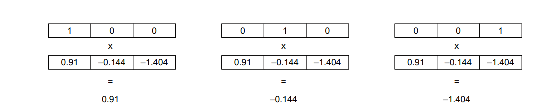

The interpretation of the signs of the weights for one-hot encoded features follows the
same intuition as the bias term. If a weight is positive, the respective feature is an indicator of churn, and vice versa. If it’s negative, it’s more likely to belong to a nonchurning customer.
The first weight for contract=month-to-month is positive, so customers with this type of contract are
more likely to churn than not. The other two features, contract=one_year and
contract=two_years, have negative signs, so such clients are more likely to remain
loyal to the company.

The magnitude of the weights also matters. For two_year, the weight is –1.404,
which is greater in magnitude than –0.144 — the weight for one_year. So, a two-year
contract is a stronger indicator of not churning than a one-year one. It confirms the
feature importance analysis we did previously. The risk ratios (the risk of churning)
for this set of features are 1.55 for monthly, 0.44 for one-year, and 0.10 for two-year.

Now let’s have a look at the numerical features. We have two of them: tenure and totalcharges. The weight of the tenure feature is –0.097, which has a negative sign. This means the same thing: the feature is an indicator of no churn.We already know, from the feature importance analysis that the longer clients stay with us, the less likely
they are to churn. The correlation between tenure and churn is –0.35, which is also a negative number. The weight of this feature confirms it: for every month that the client spends with us, the total score gets lower by 0.097.

The other numerical feature, totalchanges, has weight of zero. Because it’s zero,
no matter what the value of this feature is, the model will never consider it, so this feature is not really important for making the predictions.

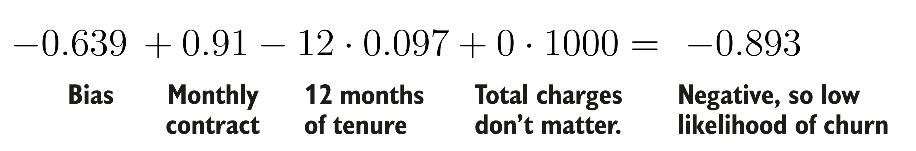
The score the model calculates for a customer with a month-to-month contract and 12 months of tenure
This is the prediction we make for this customer:
• We start with the baseline score. It’s the bias term with the value of –0.639.

• Because it’s a month-to-month contract, we add 0.91 to this value and get 0.271.
Now the score becomes positive, so it may mean that the client is going to
churn. We know that a monthly contract is a strong indicator of churning

• Next, we consider the tenure variable. For each month that the customer stayed
with us, we subtract 0.097 from the score so far. Thus, we get 0.271 – 12 · 0.097 =
–0.893. Now the score is negative again, so the likelihood of churn decreases.

• Now we add the amount of money the customer paid us (totalcharges) multiplied by the weight of this feature, but because it’s zero, we don’t do anything.
The result stays –0.893.

• The final score is a negative number, so we believe that the customer is not very
likely to churn soon.

• To see the actual probability of churn, we compute the sigmoid of the score,
and it’s approximately 0.29. We can treat this as the probability that this customer will churn.

# Predict

In [77]:
customer_1 = {
    'customerid': '8879-zkjof',
    'gender': 'female',
    'seniorcitizen': 0,
    'partner': 'no',
    'dependents': 'no',
    'tenure': 41,
    'phoneservice': 'yes',
    'multiplelines': 'no',
    'internetservice': 'dsl',
    'onlinesecurity': 'yes',
    'onlinebackup': 'no',
    'deviceprotection': 'yes',
    'techsupport': 'yes',
    'streamingtv': 'yes',
    'streamingmovies': 'yes',
    'contract': 'one_year',
    'paperlessbilling': 'yes',
    'paymentmethod': 'bank_transfer_(automatic)',
    'monthlycharges': 79.85,
    'totalcharges': 3320.75,
}

In [78]:
X_test = dv.transform([customer_1])
model.predict_proba(X_test)[0, 1]

0.07332083697634781

In [79]:
customer_2 = {
    'gender': 'female',
    'seniorcitizen': 1,
    'partner': 'no',
    'dependents': 'no',
    'phoneservice': 'yes',
    'multiplelines': 'yes',
    'internetservice': 'fiber_optic',
    'onlinesecurity': 'no',
    'onlinebackup': 'no',
    'deviceprotection': 'no',
    'techsupport': 'no',
    'streamingtv': 'yes',
    'streamingmovies': 'no',
    'contract': 'month-to-month',
    'paperlessbilling': 'yes',
    'paymentmethod': 'electronic_check',
    'tenure': 1,
    'monthlycharges': 85.7,
    'totalcharges': 85.7
}

In [80]:
X_test = dv.transform([customer_2])
model.predict_proba(X_test)[0, 1]

0.832165721724653

# Evaluation metric

In [81]:
y_pred = model.predict_proba(X_val)[:, 1]

In [82]:
churn = y_pred >= 0.5

## Accuracy

In [83]:
(churn == y_val).mean()

0.8016129032258065

In [84]:
from sklearn.metrics import accuracy_score

In [85]:
thresholds = np.linspace(0, 1, 11)

In [86]:
accuracies = []

In [87]:
for t in thresholds:
    churn = y_pred >= t
    acc = accuracy_score(y_val, churn)
    accuracies.append(acc)

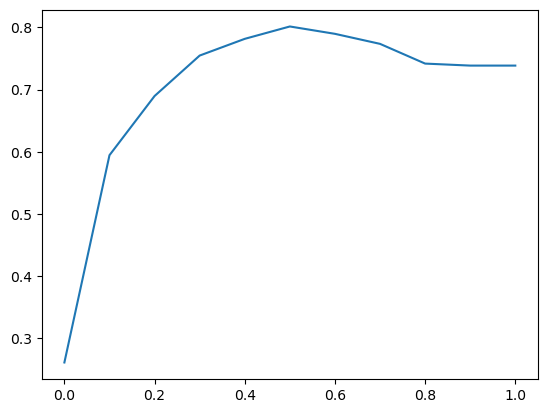

In [88]:
plt.plot(thresholds, accuracies)

In [89]:
val_dict_small = df_val[small_subset].to_dict(orient='records')
X_small_val = dv_small.transform(val_dict_small)
y_pred_small = model_small.predict_proba(X_small_val)[:, 1]
churn_small = y_pred_small >= 0.5
accuracy_score(y_val, churn_small)

0.7672043010752688

we see that the accuracy of the small model is 76%. So, the large model is actually 4% more accurate than the small model

### Dummy baseline -  a dummy model that always predicts the same value.
the dataset is imbalanced, and we don’t have many churned users.
So, the dummy model can always predict the majority class — “no churn.” 

In [90]:
size_val = len(y_val)
baseline = np.repeat(False, size_val)

In [91]:
accuracy_score(baseline, y_val)

0.7387096774193549

#### Baseline accuracy is 74%. 
This situation is because we have a class imbalance.

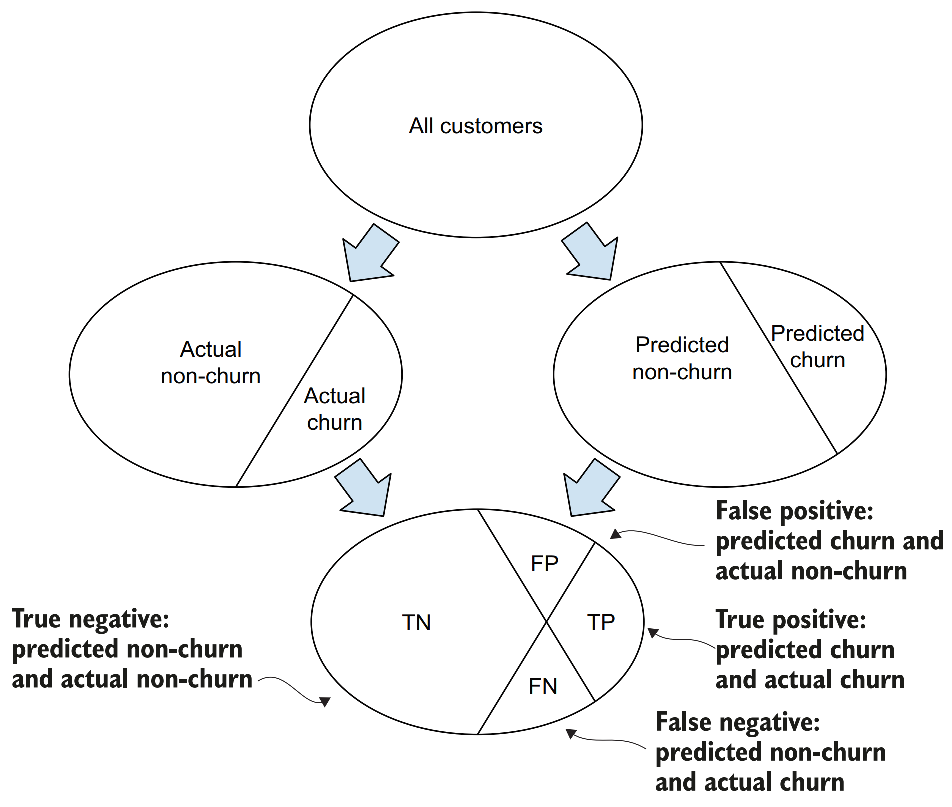

In [92]:
t = 0.5
predict_churn = (y_pred >= t)
predict_no_churn = (y_pred < t)
actual_churn = (y_val == 1)
actual_no_churn = (y_val == 0)
true_positive = (predict_churn & actual_churn).sum()
false_positive = (predict_churn & actual_no_churn).sum()
false_negative = (predict_no_churn & actual_churn).sum()
true_negative = (predict_no_churn & actual_no_churn).sum()

In [93]:
confusion_table = np.array([[true_negative, false_positive], [false_negative, true_positive]])

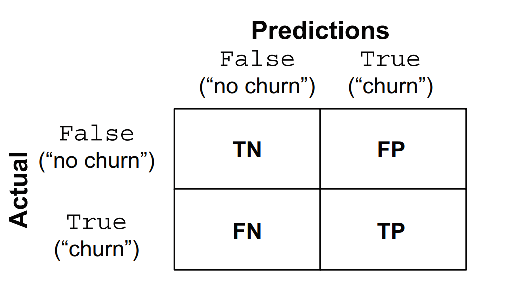

In [94]:
confusion_table / confusion_table.sum()

array([[0.64623656, 0.09247312],
       [0.10591398, 0.15537634]])

accuracy = (TN + TP) / (TN + TP + FN + FP)

P = TP / (TP + FP)

R = TP / (TP + FN)

In [95]:
precision = true_positive / (true_positive + false_positive)
precision

0.6268980477223427

In [96]:
recall = true_positive / (true_positive + false_negative)
recall

0.5946502057613169

We make two types of mistakes:
• We accidentally send messages to people who weren’t going to churn — these people are the false positives of the model.
• We also sometimes fail to identify people who are actually going to churn. We don’t send messages to these people — they are our false negatives.

Precision helps us understand how many people received a promotional message by mistake. The better the precision, the fewer false positives we have. 
Recall helps us understand how many of the churning customers we failed to find.

Precision and recall are useful metrics, but they describe the performance of a
classifier only at a certain threshold. Often it’s useful to have a metric that summarizes
the performance of a classifier for all possible threshold choices such as ROC curve. 

ROC curve is based on two quantities, FPR and TPR:

• False positive rate (FPR): the fraction of false positives among all negative examples

• True positive rate (TPR): the fraction of true positives among all positive examples

FPR = FP / (FP + TN)

TPR = TP / (TP + FN)

In [97]:
FPR = false_positive / (false_positive + true_negative)
FPR

0.12518195050946143

FPR is the fraction of users we predicted as churning among everybody who didn’t
churn. A small value for FPR tells us that a model is good 

TPR is the fraction of users who we predicted as churning among everybody who
actually did churn. Note that TPR is the same as recall, so the higher the TPR is, the
better.

In [98]:
scores = []
thresholds = np.linspace(0, 1, 101)
for t in thresholds:
    tp = ((y_pred >= t) & (y_val == 1)).sum()
    fp = ((y_pred >= t) & (y_val == 0)).sum()
    fn = ((y_pred < t) & (y_val == 1)).sum()
    tn = ((y_pred < t) & (y_val == 0)).sum()
    scores.append((t, tp, fp, fn, tn))

In [99]:
df_scores = pd.DataFrame(scores)
df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']

In [100]:
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,486,1374,0,0
10,0.1,458,726,28,648
20,0.2,421,512,65,862
30,0.3,380,350,106,1024
40,0.4,337,257,149,1117
50,0.5,289,172,197,1202
60,0.6,200,105,286,1269
70,0.7,99,34,387,1340
80,0.8,7,1,479,1373
90,0.9,0,0,486,1374


In [101]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

In [102]:
df_scores[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,486,1374,0,0,1.000000,1.000000
10,0.1,458,726,28,648,0.942387,0.528384
20,0.2,421,512,65,862,0.866255,0.372635
30,0.3,380,350,106,1024,0.781893,0.254731
40,0.4,337,257,149,1117,0.693416,0.187045
50,0.5,289,172,197,1202,0.594650,0.125182
60,0.6,200,105,286,1269,0.411523,0.076419
70,0.7,99,34,387,1340,0.203704,0.024745
80,0.8,7,1,479,1373,0.014403,0.000728
90,0.9,0,0,486,1374,0.000000,0.000000


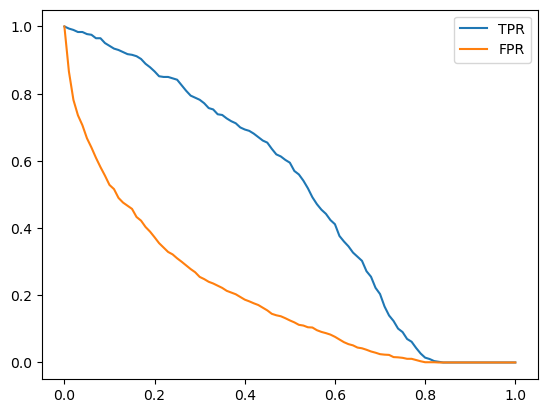

In [103]:
plt.plot(df_scores.threshold, df_scores.tpr, label='TPR')
plt.plot(df_scores.threshold, df_scores.fpr, label='FPR')
plt.legend()

Ideally, FPR should go down very quickly. A small FPR indicates that the model
makes very few mistakes predicting negative examples (false positives). On the other hand, TPR should go down slowly, ideally staying near 100% all the time:
that will mean that the model predicts true positives well.

let’s compare TPR and FPR with two baseline models: a random model and the ideal model. 

### Precision-Recall curve, F1-Score

In [131]:
df_scores['precision'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['recall'] = df_scores.tp / (df_scores.tp + df_scores.fn)

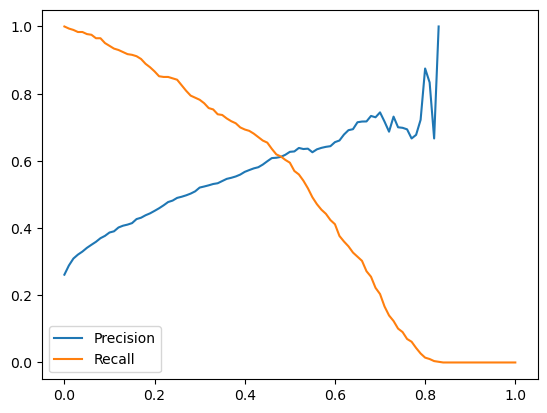

In [132]:
plt.plot(df_scores.threshold, df_scores.precision, label='Precision')
plt.plot(df_scores.threshold, df_scores.recall, label='Recall')
plt.legend()

When plotting precision and recall for different threshold values, we can see
that a conflict exists between precision and recall: when one goes up, the other
goes down, and the other way around. This is called the “precision-recall tradeoff”: we cannot select a threshold that makes both precision and recall good.
However, we do have strategies for selecting the threshold, even though precision and recall are conflicting. One of them is plotting precision and recall
curves and seeing where they intersect, and using this threshold for binarizing
the predictions.

Another idea for working around the precision-recall trade-off is the F1 score — a score that combines both precision and recall into one value.


In [136]:
df_scores['f1_score'] = 2*df_scores.precision / (df_scores.precision + df_scores.recall)

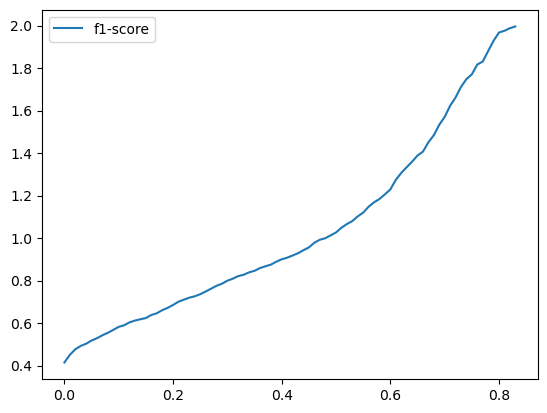

In [137]:
plt.plot(df_scores.threshold, df_scores.f1_score, label='f1-score')
plt.legend()

to select
the best threshold, we can simply choose the one that maximizes the F1 score

#### Random model

In [104]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))

In [105]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []
    thresholds = np.linspace(0, 1, 101)
    for t in thresholds:
        tp = ((y_pred >= t) & (y_val == 1)).sum()
        fp = ((y_pred >= t) & (y_val == 0)).sum()
        fn = ((y_pred < t) & (y_val == 1)).sum()
        tn = ((y_pred < t) & (y_val == 0)).sum()
        scores.append((t, tp, fp, fn, tn))
    df_scores = pd.DataFrame(scores)
    df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
    return df_scores

In [106]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)

In [107]:
df_rand[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,486,1374,0,0,1.000000,1.000000
10,0.1,440,1236,46,138,0.905350,0.899563
20,0.2,392,1101,94,273,0.806584,0.801310
30,0.3,339,972,147,402,0.697531,0.707424
40,0.4,288,849,198,525,0.592593,0.617904
50,0.5,239,723,247,651,0.491770,0.526201
60,0.6,193,579,293,795,0.397119,0.421397
70,0.7,152,422,334,952,0.312757,0.307132
80,0.8,98,302,388,1072,0.201646,0.219796
90,0.9,57,147,429,1227,0.117284,0.106987


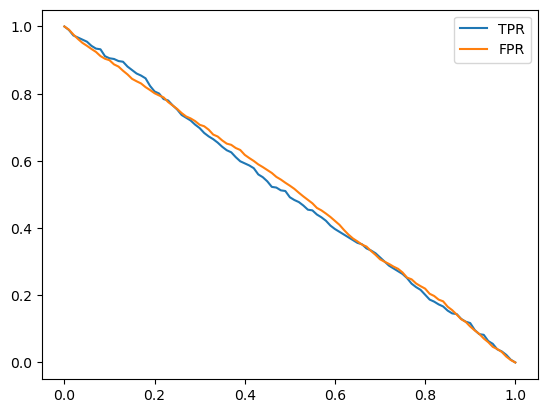

In [108]:
plt.plot(df_rand.threshold, df_rand.tpr, label='TPR')
plt.plot(df_rand.threshold, df_rand.fpr, label='FPR')
plt.legend()

#### Ideal model
Let’s generate the ideal predictions.We generate an array with
fake target variables that are already ordered: first it contains only 0s and then only 1s. 
As for “predictions,” we simply can create an array with numbers that
grow from 0 in the first cell to 1 in the last cell.

In [109]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_pred_ideal = np.linspace(0, 1, num_neg + num_pos)
df_ideal = tpr_fpr_dataframe(y_ideal, y_pred_ideal)

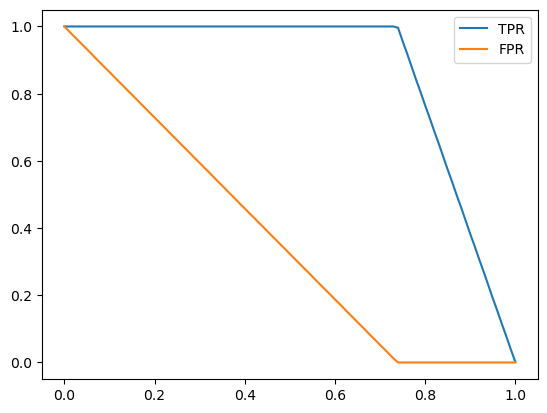

In [110]:
plt.plot(df_ideal.threshold, df_ideal.tpr, label='TPR')
plt.plot(df_ideal.threshold, df_ideal.fpr, label='FPR')
plt.legend()

#### ROC curve

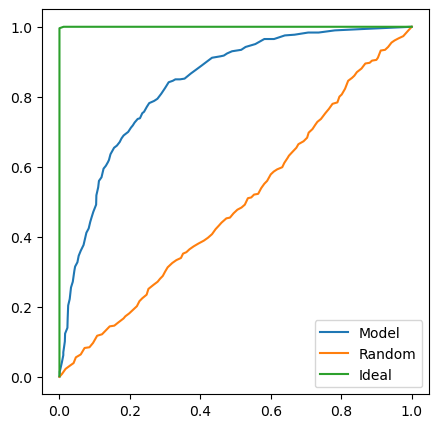

In [111]:
plt.figure(figsize=(5, 5))
plt.plot(df_scores.fpr, df_scores.tpr, label='Model')
plt.plot(df_rand.fpr, df_rand.tpr, label='Random')
plt.plot(df_ideal.fpr, df_ideal.tpr, label='Ideal')
plt.legend()

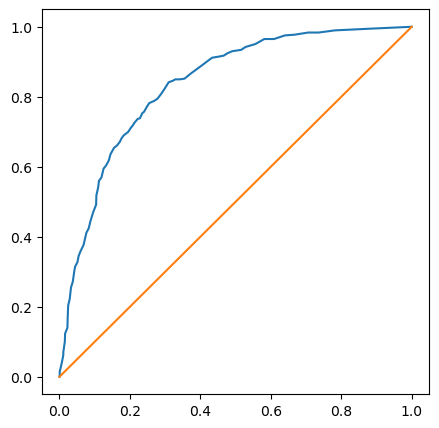

In [112]:
plt.figure(figsize=(5, 5))
plt.plot(df_scores.fpr, df_scores.tpr)
plt.plot([0, 1], [0, 1])

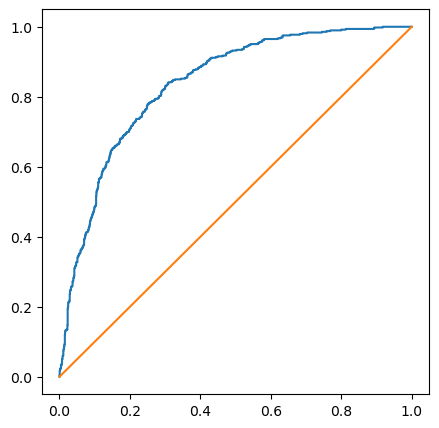

In [113]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])

ROC curves of good models go up as much as they can before turning right.
Poor models, on the other hand, tend to have more false positives from the beginning, so
they tend to go right earlier.

We can use this for comparing multiple models: we can simply plot them on the same
graph and see which of them is closer to the ideal point of (0, 1). 

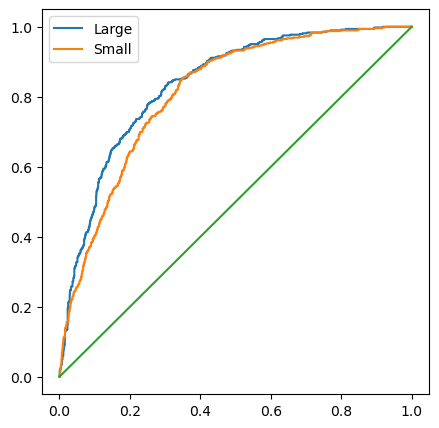

In [114]:
fpr_large, tpr_large, _ = roc_curve(y_val, y_pred)
fpr_small, tpr_small, _ = roc_curve(y_val, y_pred_small)
plt.figure(figsize=(5, 5))
plt.plot(fpr_large, tpr_large, label='Large')
plt.plot(fpr_small, tpr_small, label='Small')
plt.plot([0, 1], [0, 1])
plt.legend()

#### Plotting multiple ROC curves on the same graph helps us visually identify which model performs better.

## AUC, or the area under the ROC curve

The ideal model forms a 1x1 square, so the area under its ROC curve is 1, or 100%.
The random model takes only half of that, so its AUC is 0.5, or 50%. The AUCs of our
two models — the large one and the small one — will be somewhere between the random baseline of 50% and the ideal curve of 100%.
IMPORTANT An AUC of 0.9 is indicative of a reasonably good model; 0.8 is
okay, 0.7 is not very performant, and 0.6 indicates quite poor performance.

In [115]:
from sklearn.metrics import auc
auc(df_scores.fpr, df_scores.tpr)

0.8359001084215382

 roc_auc_score function from Scikit-learn, which takes care of everything and simply returns the AUC of our model

In [117]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, y_pred)

0.8363366398907399

AUC has a nice probabilistic interpretation: it tells us what the probability is that a randomly selected positive example will have a score higher
than a randomly selected negative example.
 Suppose we randomly pick a customer that we know churned and a customer who
didn’t and then apply the model to these customers and see what the score is for each.
We want the model to score the churning customer higher than the non-churning
one. AUC tells us the probability of that happening: it’s the probability that the score
of a randomly selected churning customer is higher than the score of a randomly
selected non-churning one.
 We can verify this. If we do this experiment 10,000 times and then count how many
times the score of the positive example was higher than the score of the negative one,
the percentage of cases when it’s true should roughly correspond to the AUC

AUC thus not only gives us a way of evaluating the models at all possible thresholds
but also describes how well the model separates two classes: in our case, churning and non-churning. If the separation is good, then we can order the customers such that
most of the churning users come first. Such a model will have a good AUC score.
NOTE You should keep this interpretation in mind: it provides an easy way to
explain the meaning behind AUC to people without a machine learning
background, such as managers and other decision makers. The process of finding the best parameters is called “parameter tuning,” and in the
next section we will see how to do this.

We’ve seen that precision and recall are better metrics for evaluating classification models than accuracy because they don’t rely on false positives, the amount
of which could be high in imbalanced datasets. Yet, we saw later that AUC does
actually use false positives in FPR. For very highly imbalanced cases (say, 1,000
negatives to 1 positive), AUC may become problematic as well.

#### Another metric - precision-recall curve, or AU PR
works better in cases: area under the precision-recall curve, or AU PR. The
precision-recall curve is similar to ROC, but instead of plotting FPR versus TPR,
we plot recall on the x-axis and precision on the y-axis.

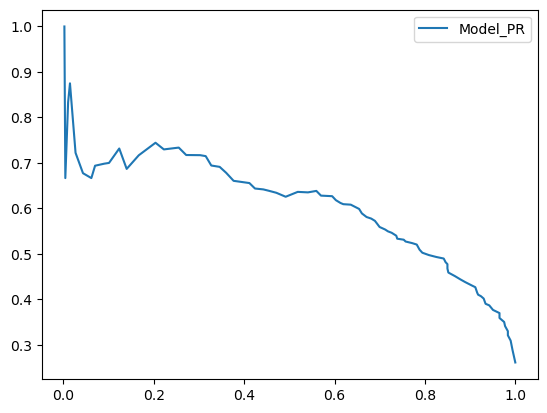

In [139]:
plt.plot(df_scores.recall, df_scores.precision, label='Model_PR')
plt.legend()

### Parameter Tuning

In [118]:
def train(df, y):
    cat = df[categorical + numerical].to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    dv.fit(cat)
    X = dv.transform(cat)
    model = LogisticRegression(solver='liblinear')
    model.fit(X, y)
    return dv, model

In [119]:
def predict(df, dv, model):
    cat = df[categorical + numerical].to_dict(orient='records')
    X = dv.transform(cat)
    y_pred = model.predict_proba(X)[:, 1]
    return y_pred

### K-fold cross validation

In [122]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
aucs = []
for train_idx, val_idx in kfold.split(df_train_full):
    df_train = df_train_full.iloc[train_idx]
    df_val = df_train_full.iloc[val_idx]
    y_train = df_train.churn.values
    y_val = df_val.churn.values
    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)
    auc = roc_auc_score(y_val, y_pred)
    aucs.append(auc) 

In [125]:
print('auc = %0.3f ± %0.3f' % (np.mean(aucs), np.std(aucs))) ## type ± by using Option then Shift then +/= key comb.
### https://www.webnots.com/option-or-alt-key-shortcuts-to-insert-symbols-in-mac-os-x/

auc = 0.842 ± 0.012


The model we trained previously was using the default value for the parameter C, which controls the amount of regularization. Let’s select our cross-validation procedure for selecting the best parameter C.

In [126]:
def train(df, y, C):
    cat = df[categorical + numerical].to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    dv.fit(cat)
    X = dv.transform(cat)
    model = LogisticRegression(solver='liblinear', C=C)
    model.fit(X, y)
    return dv, model

To find the best parameter C.

✅ Loop over different values of C.

✅ For each C, run cross-validation and record the mean AUC across all folds as well as the standard deviation.


In [128]:
nfolds = 5
kfold = KFold(n_splits=nfolds, shuffle=True, random_state=1)
for C in [0.001, 0.01, 0.1, 0.5, 1, 10]:
    aucs = []
    for train_idx, val_idx in kfold.split(df_train_full):
        df_train = df_train_full.iloc[train_idx]
        df_val = df_train_full.iloc[val_idx]
        y_train = df_train.churn.values
        y_val = df_val.churn.values
        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)
        auc = roc_auc_score(y_val, y_pred)
        aucs.append(auc)
    print('C=%s, auc = %0.3f ± %0.3f' % (C, np.mean(aucs), np.std(aucs)))

C=0.001, auc = 0.825 ± 0.013
C=0.01, auc = 0.839 ± 0.009
C=0.1, auc = 0.841 ± 0.007
C=0.5, auc = 0.841 ± 0.007
C=1, auc = 0.841 ± 0.008
C=10, auc = 0.841 ± 0.007


What we see is that after C = 0.1, the average AUC is the same and doesn’t grow
anymore.  However, the standard deviation is smaller for C = 0.5 than for C = 0.1, so we
should use that. The reason we prefer C = 0.5 to C = 1 and C = 10 is simple: when
selecting the best parameter C using cross-validation.
Uses this parameter during training, C parameter is small, the model is more regularized. The weights of this model are more restricted, so in general, they are smaller. Small weights in the model give us
additional assurance that the model will behave well when we use it on real data. So
we select C = 0.5.

Now we need to do the last step: train the model on the entire train and validation
datasets and apply it to the test dataset to verify it indeed works well.

In [129]:
y_train = df_train_full.churn.values
y_test = df_test.churn.values
dv, model = train(df_train_full, y_train, C=0.5)
y_pred = predict(df_test, dv, model)
auc = roc_auc_score(y_test, y_pred)
print('auc = %.3f' % auc)

auc = 0.858


the performance of the model (AUC) on the
held-out test set is 0.858. That’s a little higher than what we had on the validation set, but that’s not an issue;
it could happen just by chance. What’s important is that the score is not significantly
different from the validation score.
 Now we can use this model for scoring real customers and think about our marketing campaign for preventing churn. 

# Test & Save

In [140]:
customer = {
 'customerid': '8879-zkjof',
 'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'no',
 'dependents': 'no',
 'tenure': 41,
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'dsl',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'one_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'bank_transfer_(automatic)',
 'monthlycharges': 79.85,
 'totalcharges': 3320.75,
}

In [142]:
df = pd.DataFrame([customer])
y_pred = predict(df, dv, model)
print(f"Predicted probability of churn for this customer {y_pred[0]}")

Predicted probability of churn for this customer 0.05960525381099281


In [152]:
def predict_single(customer, dv, model):
    X = dv.transform([customer])
    y_pred = model.predict_proba(X)[:, 1]
    return "Predicted probability of churn for this customer {}".format(y_pred[0])

In [153]:
predict_single(customer, dv, model)

'Predicted probability of churn for this customer 0.05960525381099281'

In [155]:
import pickle
with open('churn-model.bin', 'wb') as f_out:
    pickle.dump((dv, model), f_out)

# Test Flask web service

In [156]:
import requests
url = 'http://localhost:9696/predict'
response = requests.post(url, json=customer)
result = response.json()

In [157]:
result

{'churn': False, 'churn_probability': 0.05960525381099281}

For local development, Anaconda is a perfect tool: it has almost all the libraries we may
ever need. This, however, also has a downside: it takes up 4 GB when unpacked, which is
too large. For production, we prefer to have only the libraries we actually need.
 Additionally, different services have different requirements. Often, these requirements conflict, so we cannot use the same environment for running multiple services
at the same time.
 In this section, we see how to manage dependencies of our application in an isolated way that doesn’t interfere with other services. We cover two tools for this: Pipenv,
for managing Python libraries, and Docker, for managing the system dependencies
such as the operating system and the system libraries.

The built-in Flask web server is indeed for development only: it’s very easy to use for
testing our application, but it won’t work reliably under load. We should use a proper
WSGI server instead, as the warning suggests.
 WSGI stands for web server gateway interface, which is a specification describing how
Python applications should handle HTTP requests. We will, however, address the warning by installing a production WSGI server. 

In [158]:
response = requests.post(url, json=customer)
result = response.json()
print(f"Result={result}")

Result={'churn': False, 'churn_probability': 0.05960525381099281}


# Test Docker
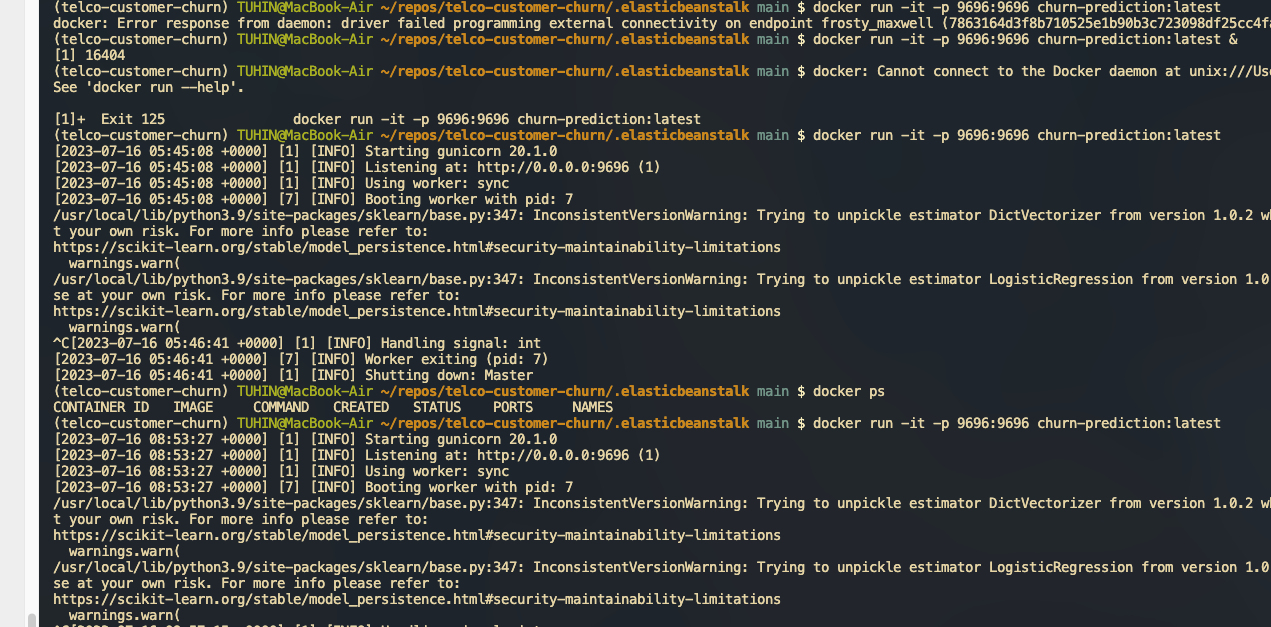

We manage Python dependencies with Pipenv. But to manage the system libraries and 
operating system (OS) these dependencies, we need docker. We might use Ubuntu version 16.04 for developing our service, but if
some of our colleagues use Ubuntu version 20.04, they may run into trouble when trying to execute the service on their laptop.
 Docker solves this “but it works on my machine” problem by also packaging the OS and the system libraries into a Docker container — a self-contained environment that
works anywhere where Docker is installed. In case of no isolation ,the service runs with system Python. In virtual
environments, we isolate the dependencies of our service inside the environment.
In Docker containers, we isolate the entire environment of the service, including
the OS and system libraries.

Once the service is packaged into a Docker container, we can run it on the host
machine — our laptop (regardless of the OS) or any public cloud provider.

Docker image — the description of our service that
includes all the settings and dependencies. Docker will later use the image to create a
container. To do it, we need a Dockerfile — a file with instructions on how the image
should be created.

In [159]:
response = requests.post(url, json=customer)
result = response.json()

In [160]:
print(f"Result={result}")

Result={'churn': False, 'churn_probability': 0.05960525381099281}


Docker makes it easy to run services in a reproducible way. With Docker, the environment inside the container always stays the same. This means that if we can run our service on a laptop, it will work anywhere else.

# Test Elastic Beanstalk locally

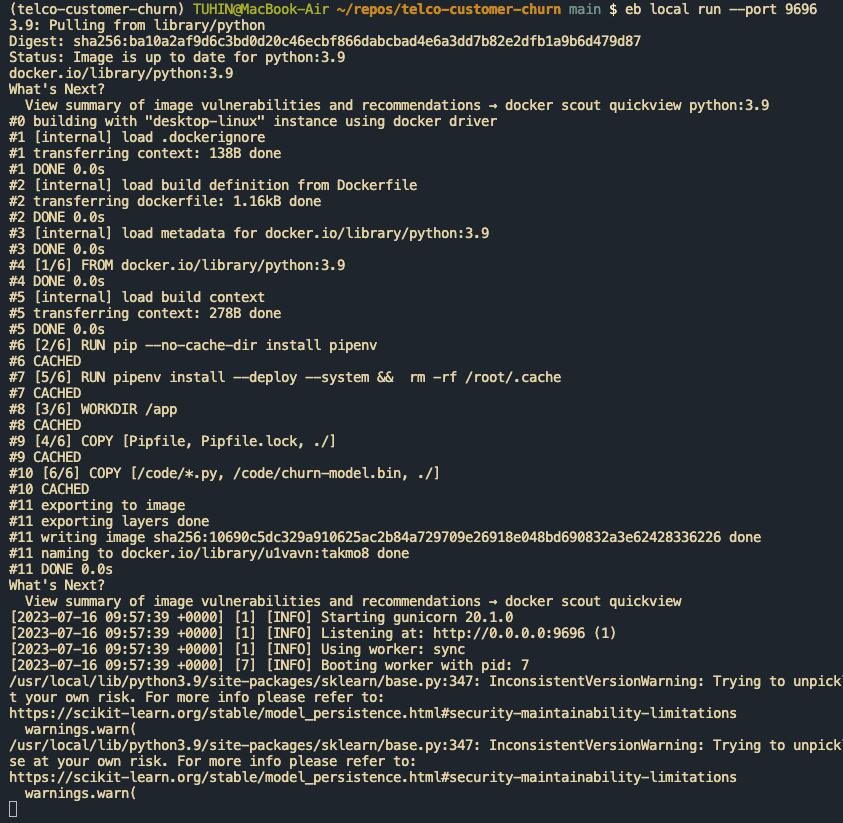

In [161]:
response = requests.post(url, json=customer)
result = response.json()
print(f"Result={result}")

Result={'churn': False, 'churn_probability': 0.05960525381099281}


# Test AWS

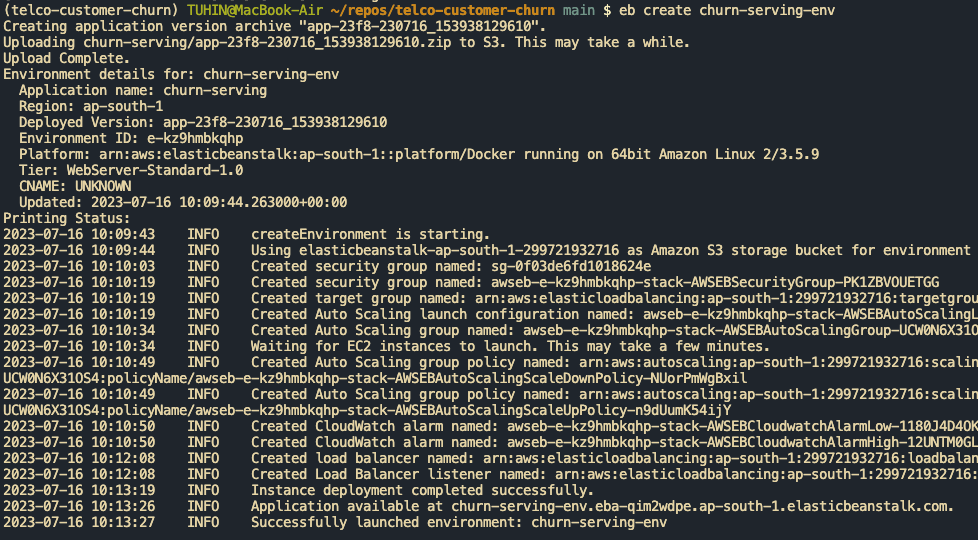

In [164]:
host = 'churn-serving-env.eba-qim2wdpe.ap-south-1.elasticbeanstalk.com'
url = 'http://%s/predict' % host
response = requests.post(url, json=customer)
result = response.json()
result

{'churn': False, 'churn_probability': 0.05960525381099281}